In [2]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

Using TensorFlow backend.


In [3]:
# Read data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("./training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("./validation.csv", delimiter=",", skip_header=True)

# Split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:6]
Y1 = TrainingSet[:,6]

X2 = ValidationSet[:,0:6]
Y2 = ValidationSet[:,6]

In [4]:
# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Train on 232 samples, validate on 76 samples
Epoch 1/10000000
 - 1s - loss: 404.3374 - val_loss: 309.6100
Epoch 2/10000000
 - 0s - loss: 375.2555 - val_loss: 294.8144
Epoch 3/10000000
 - 0s - loss: 359.7111 - val_loss: 285.7164
Epoch 4/10000000
 - 0s - loss: 351.3803 - val_loss: 280.9324
Epoch 5/10000000
 - 0s - loss: 347.6015 - val_loss: 278.0652
Epoch 6/10000000
 - 0s - loss: 344.8125 - val_loss: 275.5017
Epoch 7/10000000
 - 0s - loss: 341.8539 - val_loss: 272.8559
Epoch 8/10000000
 - 0s - loss: 338.6591 - val_loss: 270.0061
Epoch 9/10000000
 - 0s - loss: 335.5329 - val_loss: 266.7927
Epoch 10/10000000
 - 0s - loss: 331.8977 - val_loss: 263.3298
Epoch 11/10000000
 - 0s - loss: 327.9559 - val_loss: 259.5031
Epoch 12/10000000
 - 0s - loss: 323.5365 - val_loss: 255.3663
Epoch 13/10000000
 - 0s - loss: 318.8910 - val_loss: 250.9605
Epoch 14/10000000
 - 0s - loss: 313.6974 - val_loss: 246.3042
Epoch 15/10000000
 - 0s - loss: 308.3256 - val_loss: 241.3783
Epoch 16/10000000
 - 0s - loss: 30

 - 0s - loss: 225.8677 - val_loss: 194.0932
Epoch 133/10000000
 - 0s - loss: 225.0746 - val_loss: 192.8357
Epoch 134/10000000
 - 0s - loss: 224.8184 - val_loss: 191.6137
Epoch 135/10000000
 - 0s - loss: 224.4828 - val_loss: 191.6492
Epoch 136/10000000
 - 0s - loss: 223.8026 - val_loss: 192.1965
Epoch 137/10000000
 - 0s - loss: 223.7140 - val_loss: 193.6813
Epoch 138/10000000
 - 0s - loss: 224.0164 - val_loss: 193.0983
Epoch 139/10000000
 - 0s - loss: 223.2894 - val_loss: 192.5623
Epoch 140/10000000
 - 0s - loss: 222.5569 - val_loss: 190.9665
Epoch 141/10000000
 - 0s - loss: 221.9068 - val_loss: 189.9485
Epoch 142/10000000
 - 0s - loss: 221.5390 - val_loss: 189.2122
Epoch 143/10000000
 - 0s - loss: 221.4248 - val_loss: 188.5644
Epoch 144/10000000
 - 0s - loss: 221.0609 - val_loss: 188.0770
Epoch 145/10000000
 - 0s - loss: 220.7368 - val_loss: 187.8320
Epoch 146/10000000
 - 0s - loss: 220.1484 - val_loss: 187.6898
Epoch 147/10000000
 - 0s - loss: 219.4844 - val_loss: 187.3777
Epoch 148/1

Epoch 264/10000000
 - 0s - loss: 81.8762 - val_loss: 72.9376
Epoch 265/10000000
 - 0s - loss: 83.0389 - val_loss: 69.7595
Epoch 266/10000000
 - 0s - loss: 81.1133 - val_loss: 72.8278
Epoch 267/10000000
 - 0s - loss: 80.8147 - val_loss: 71.7250
Epoch 268/10000000
 - 0s - loss: 80.2131 - val_loss: 70.1438
Epoch 269/10000000
 - 0s - loss: 80.2669 - val_loss: 69.7171
Epoch 270/10000000
 - 0s - loss: 79.9815 - val_loss: 71.5652
Epoch 271/10000000
 - 0s - loss: 79.8216 - val_loss: 72.3033
Epoch 272/10000000
 - 0s - loss: 80.0324 - val_loss: 70.5617
Epoch 273/10000000
 - 0s - loss: 79.5343 - val_loss: 69.3942
Epoch 274/10000000
 - 0s - loss: 80.4780 - val_loss: 69.5802
Epoch 275/10000000
 - 0s - loss: 79.0237 - val_loss: 74.1403
Epoch 276/10000000
 - 0s - loss: 80.2075 - val_loss: 70.0187
Epoch 277/10000000
 - 0s - loss: 78.5222 - val_loss: 69.2006
Epoch 278/10000000
 - 0s - loss: 81.8816 - val_loss: 70.3821
Epoch 279/10000000
 - 0s - loss: 83.0620 - val_loss: 79.5702
Epoch 280/10000000
 - 0s

 - 0s - loss: 57.3627 - val_loss: 49.5722
Epoch 399/10000000
 - 0s - loss: 57.6261 - val_loss: 49.9393
Epoch 400/10000000
 - 0s - loss: 56.4614 - val_loss: 50.4169
Epoch 401/10000000
 - 0s - loss: 56.6917 - val_loss: 51.8208
Epoch 402/10000000
 - 0s - loss: 57.1966 - val_loss: 49.4367
Epoch 403/10000000
 - 0s - loss: 56.2179 - val_loss: 49.9755
Epoch 404/10000000
 - 0s - loss: 56.1844 - val_loss: 49.5251
Epoch 405/10000000
 - 0s - loss: 56.3043 - val_loss: 50.0773
Epoch 406/10000000
 - 0s - loss: 56.6836 - val_loss: 50.3680
Epoch 407/10000000
 - 0s - loss: 55.9443 - val_loss: 48.9125
Epoch 408/10000000
 - 0s - loss: 56.8805 - val_loss: 48.9223
Epoch 409/10000000
 - 0s - loss: 55.5438 - val_loss: 51.5834
Epoch 410/10000000
 - 0s - loss: 56.3839 - val_loss: 49.1182
Epoch 411/10000000
 - 0s - loss: 56.3195 - val_loss: 48.8493
Epoch 412/10000000
 - 0s - loss: 55.4827 - val_loss: 53.4909
Epoch 413/10000000
 - 0s - loss: 56.9031 - val_loss: 48.9527
Epoch 414/10000000
 - 0s - loss: 55.5117 - 

Epoch 533/10000000
 - 0s - loss: 44.4090 - val_loss: 39.3877
Epoch 534/10000000
 - 0s - loss: 43.9356 - val_loss: 38.3515
Epoch 535/10000000
 - 0s - loss: 44.1925 - val_loss: 38.3825
Epoch 536/10000000
 - 0s - loss: 43.5761 - val_loss: 39.7465
Epoch 537/10000000
 - 0s - loss: 43.9470 - val_loss: 39.4896
Epoch 538/10000000
 - 0s - loss: 43.9855 - val_loss: 38.6534
Epoch 539/10000000
 - 0s - loss: 43.5445 - val_loss: 37.8950
Epoch 540/10000000
 - 0s - loss: 43.7675 - val_loss: 37.6924
Epoch 541/10000000
 - 0s - loss: 43.8592 - val_loss: 39.0426
Epoch 542/10000000
 - 0s - loss: 42.7757 - val_loss: 37.5506
Epoch 543/10000000
 - 0s - loss: 45.9564 - val_loss: 37.4781
Epoch 544/10000000
 - 0s - loss: 43.7439 - val_loss: 39.6255
Epoch 545/10000000
 - 0s - loss: 42.9138 - val_loss: 37.4169
Epoch 546/10000000
 - 0s - loss: 43.3157 - val_loss: 37.4114
Epoch 547/10000000
 - 0s - loss: 42.5154 - val_loss: 39.7301
Epoch 548/10000000
 - 0s - loss: 44.1312 - val_loss: 38.0989
Epoch 549/10000000
 - 0s

 - 0s - loss: 30.6087 - val_loss: 29.8113
Epoch 668/10000000
 - 0s - loss: 32.9195 - val_loss: 29.7136
Epoch 669/10000000
 - 0s - loss: 31.3009 - val_loss: 26.6765
Epoch 670/10000000
 - 0s - loss: 30.9495 - val_loss: 26.6389
Epoch 671/10000000
 - 0s - loss: 29.9115 - val_loss: 30.0596
Epoch 672/10000000
 - 0s - loss: 32.6541 - val_loss: 27.2927
Epoch 673/10000000
 - 0s - loss: 29.8676 - val_loss: 26.5845
Epoch 674/10000000
 - 0s - loss: 31.2479 - val_loss: 26.3071
Epoch 675/10000000
 - 0s - loss: 29.6489 - val_loss: 31.3787
Epoch 676/10000000
 - 0s - loss: 32.5563 - val_loss: 26.6966
Epoch 677/10000000
 - 0s - loss: 29.6853 - val_loss: 25.8467
Epoch 678/10000000
 - 0s - loss: 30.2753 - val_loss: 26.1335
Epoch 679/10000000
 - 0s - loss: 29.7688 - val_loss: 26.0660
Epoch 680/10000000
 - 0s - loss: 29.4099 - val_loss: 25.7254
Epoch 681/10000000
 - 0s - loss: 30.5197 - val_loss: 25.9001
Epoch 682/10000000
 - 0s - loss: 29.6967 - val_loss: 28.6877
Epoch 683/10000000
 - 0s - loss: 29.7637 - 

Epoch 802/10000000
 - 0s - loss: 19.8665 - val_loss: 17.3853
Epoch 803/10000000
 - 0s - loss: 19.4683 - val_loss: 17.1663
Epoch 804/10000000
 - 0s - loss: 19.2933 - val_loss: 16.9227
Epoch 805/10000000
 - 0s - loss: 19.5463 - val_loss: 17.2156
Epoch 806/10000000
 - 0s - loss: 19.8774 - val_loss: 17.0710
Epoch 807/10000000
 - 0s - loss: 19.6649 - val_loss: 16.8830
Epoch 808/10000000
 - 0s - loss: 19.0174 - val_loss: 18.4748
Epoch 809/10000000
 - 0s - loss: 19.9685 - val_loss: 17.3752
Epoch 810/10000000
 - 0s - loss: 19.2507 - val_loss: 17.1456
Epoch 811/10000000
 - 0s - loss: 19.5613 - val_loss: 17.3937
Epoch 812/10000000
 - 0s - loss: 19.3270 - val_loss: 17.2942
Epoch 813/10000000
 - 0s - loss: 18.6998 - val_loss: 16.6173
Epoch 814/10000000
 - 0s - loss: 19.3615 - val_loss: 16.2984
Epoch 815/10000000
 - 0s - loss: 18.4755 - val_loss: 17.3780
Epoch 816/10000000
 - 0s - loss: 18.8318 - val_loss: 16.2087
Epoch 817/10000000
 - 0s - loss: 18.4228 - val_loss: 16.1822
Epoch 818/10000000
 - 0s

 - 0s - loss: 11.8279 - val_loss: 12.3256
Epoch 937/10000000
 - 0s - loss: 12.3382 - val_loss: 10.3997
Epoch 938/10000000
 - 0s - loss: 11.9398 - val_loss: 10.4382
Epoch 939/10000000
 - 0s - loss: 12.6542 - val_loss: 11.5473
Epoch 940/10000000
 - 0s - loss: 12.2535 - val_loss: 10.5585
Epoch 941/10000000
 - 0s - loss: 11.8319 - val_loss: 10.7189
Epoch 942/10000000
 - 0s - loss: 11.8024 - val_loss: 11.0484
Epoch 943/10000000
 - 0s - loss: 11.6419 - val_loss: 10.8282
Epoch 944/10000000
 - 0s - loss: 12.2797 - val_loss: 10.4333
Epoch 945/10000000
 - 0s - loss: 11.8923 - val_loss: 10.3076
Epoch 946/10000000
 - 0s - loss: 10.9064 - val_loss: 10.6424
Epoch 947/10000000
 - 0s - loss: 12.4064 - val_loss: 10.5742
Epoch 948/10000000
 - 0s - loss: 11.9683 - val_loss: 10.9068
Epoch 949/10000000
 - 0s - loss: 12.9133 - val_loss: 10.2823
Epoch 950/10000000
 - 0s - loss: 10.8446 - val_loss: 13.2464
Epoch 951/10000000
 - 0s - loss: 12.9546 - val_loss: 10.0711
Epoch 952/10000000
 - 0s - loss: 12.0083 - 

Epoch 1073/10000000
 - 0s - loss: 7.1126 - val_loss: 6.7266
Epoch 1074/10000000
 - 0s - loss: 7.0353 - val_loss: 6.9727
Epoch 1075/10000000
 - 0s - loss: 7.0506 - val_loss: 6.5876
Epoch 1076/10000000
 - 0s - loss: 7.0929 - val_loss: 6.6103
Epoch 1077/10000000
 - 0s - loss: 7.0441 - val_loss: 7.0209
Epoch 1078/10000000
 - 0s - loss: 7.3995 - val_loss: 6.6645
Epoch 1079/10000000
 - 0s - loss: 6.9025 - val_loss: 6.5147
Epoch 1080/10000000
 - 0s - loss: 7.1923 - val_loss: 6.9448
Epoch 1081/10000000
 - 0s - loss: 7.0143 - val_loss: 6.7769
Epoch 1082/10000000
 - 0s - loss: 6.9422 - val_loss: 6.5516
Epoch 1083/10000000
 - 0s - loss: 6.9258 - val_loss: 6.5684
Epoch 1084/10000000
 - 0s - loss: 6.8762 - val_loss: 6.4114
Epoch 1085/10000000
 - 0s - loss: 6.8413 - val_loss: 6.4650
Epoch 1086/10000000
 - 0s - loss: 7.0338 - val_loss: 6.3168
Epoch 1087/10000000
 - 0s - loss: 6.9174 - val_loss: 6.2455
Epoch 1088/10000000
 - 0s - loss: 6.8089 - val_loss: 7.5160
Epoch 1089/10000000
 - 0s - loss: 7.2199

Epoch 1210/10000000
 - 0s - loss: 4.8871 - val_loss: 4.6599
Epoch 1211/10000000
 - 0s - loss: 4.8459 - val_loss: 4.2380
Epoch 1212/10000000
 - 0s - loss: 4.7134 - val_loss: 4.5379
Epoch 1213/10000000
 - 0s - loss: 4.9625 - val_loss: 4.2001
Epoch 1214/10000000
 - 0s - loss: 5.6640 - val_loss: 4.1797
Epoch 1215/10000000
 - 0s - loss: 4.7665 - val_loss: 5.2348
Epoch 1216/10000000
 - 0s - loss: 5.1092 - val_loss: 4.1993
Epoch 1217/10000000
 - 0s - loss: 4.7074 - val_loss: 4.5000
Epoch 1218/10000000
 - 0s - loss: 4.7616 - val_loss: 4.2145
Epoch 1219/10000000
 - 0s - loss: 4.6962 - val_loss: 4.2080
Epoch 1220/10000000
 - 0s - loss: 4.5925 - val_loss: 4.9511
Epoch 1221/10000000
 - 0s - loss: 5.4358 - val_loss: 4.1291
Epoch 1222/10000000
 - 0s - loss: 5.4968 - val_loss: 4.1000
Epoch 1223/10000000
 - 0s - loss: 4.9367 - val_loss: 5.2729
Epoch 1224/10000000
 - 0s - loss: 4.8999 - val_loss: 4.9103
Epoch 1225/10000000
 - 0s - loss: 5.4134 - val_loss: 4.8376
Epoch 1226/10000000
 - 0s - loss: 5.0979

Epoch 1347/10000000
 - 0s - loss: 3.6903 - val_loss: 3.7226
Epoch 1348/10000000
 - 0s - loss: 4.8460 - val_loss: 3.2658
Epoch 1349/10000000
 - 0s - loss: 4.1240 - val_loss: 3.1851
Epoch 1350/10000000
 - 0s - loss: 3.6349 - val_loss: 3.0715
Epoch 1351/10000000
 - 0s - loss: 3.0529 - val_loss: 5.3122
Epoch 1352/10000000
 - 0s - loss: 4.4652 - val_loss: 3.8978
Epoch 1353/10000000
 - 0s - loss: 6.0339 - val_loss: 2.9468
Epoch 1354/10000000
 - 0s - loss: 4.6072 - val_loss: 4.1561
Epoch 1355/10000000
 - 0s - loss: 4.1199 - val_loss: 3.5735
Epoch 1356/10000000
 - 0s - loss: 3.9340 - val_loss: 4.3880
Epoch 1357/10000000
 - 0s - loss: 3.7959 - val_loss: 3.2653
Epoch 1358/10000000
 - 0s - loss: 3.8037 - val_loss: 3.1700
Epoch 1359/10000000
 - 0s - loss: 3.8360 - val_loss: 2.9121
Epoch 1360/10000000
 - 0s - loss: 4.1982 - val_loss: 3.0833
Epoch 1361/10000000
 - 0s - loss: 3.6434 - val_loss: 4.8926
Epoch 1362/10000000
 - 0s - loss: 4.0725 - val_loss: 3.3390
Epoch 1363/10000000
 - 0s - loss: 4.0195

Epoch 1484/10000000
 - 0s - loss: 2.8952 - val_loss: 2.4910
Epoch 1485/10000000
 - 0s - loss: 2.7863 - val_loss: 2.6719
Epoch 1486/10000000
 - 0s - loss: 2.6013 - val_loss: 2.5096
Epoch 1487/10000000
 - 0s - loss: 2.6962 - val_loss: 2.7205
Epoch 1488/10000000
 - 0s - loss: 2.7127 - val_loss: 2.4071
Epoch 1489/10000000
 - 0s - loss: 2.4658 - val_loss: 2.4665
Epoch 1490/10000000
 - 0s - loss: 2.7103 - val_loss: 2.5893
Epoch 1491/10000000
 - 0s - loss: 2.6949 - val_loss: 2.4126
Epoch 1492/10000000
 - 0s - loss: 2.7541 - val_loss: 2.5028
Epoch 1493/10000000
 - 0s - loss: 2.7892 - val_loss: 2.9719
Epoch 1494/10000000
 - 0s - loss: 2.6146 - val_loss: 2.8132
Epoch 1495/10000000
 - 0s - loss: 3.0843 - val_loss: 3.2242
Epoch 1496/10000000
 - 0s - loss: 2.7241 - val_loss: 2.6253
Epoch 1497/10000000
 - 0s - loss: 3.6451 - val_loss: 3.0720
Epoch 1498/10000000
 - 0s - loss: 4.3070 - val_loss: 2.3793
Epoch 1499/10000000
 - 0s - loss: 3.4287 - val_loss: 3.2731
Epoch 1500/10000000
 - 0s - loss: 3.1896

Epoch 1621/10000000
 - 0s - loss: 2.6920 - val_loss: 4.1844
Epoch 1622/10000000
 - 0s - loss: 3.2646 - val_loss: 2.6684
Epoch 1623/10000000
 - 0s - loss: 3.0284 - val_loss: 2.5911
Epoch 1624/10000000
 - 0s - loss: 2.8739 - val_loss: 2.0734
Epoch 1625/10000000
 - 0s - loss: 2.8522 - val_loss: 2.1815
Epoch 1626/10000000
 - 0s - loss: 2.5266 - val_loss: 4.1539
Epoch 1627/10000000
 - 0s - loss: 2.9130 - val_loss: 2.8047
Epoch 1628/10000000
 - 0s - loss: 3.2727 - val_loss: 2.5079
Epoch 1629/10000000
 - 0s - loss: 2.3573 - val_loss: 2.4039
Epoch 1630/10000000
 - 0s - loss: 2.2043 - val_loss: 2.2784
Epoch 1631/10000000
 - 0s - loss: 2.4643 - val_loss: 2.1570
Epoch 1632/10000000
 - 0s - loss: 2.1295 - val_loss: 2.0621
Epoch 1633/10000000
 - 0s - loss: 2.1308 - val_loss: 2.0175
Epoch 1634/10000000
 - 0s - loss: 2.0867 - val_loss: 2.2017
Epoch 1635/10000000
 - 0s - loss: 2.1881 - val_loss: 2.0336
Epoch 1636/10000000
 - 0s - loss: 2.1560 - val_loss: 2.0814
Epoch 1637/10000000
 - 0s - loss: 2.2111

Epoch 1758/10000000
 - 0s - loss: 2.0416 - val_loss: 2.2114
Epoch 1759/10000000
 - 0s - loss: 1.9916 - val_loss: 2.3107
Epoch 1760/10000000
 - 0s - loss: 2.0262 - val_loss: 2.0372
Epoch 1761/10000000
 - 0s - loss: 1.9480 - val_loss: 2.0025
Epoch 1762/10000000
 - 0s - loss: 1.9620 - val_loss: 2.0090
Epoch 1763/10000000
 - 0s - loss: 1.9590 - val_loss: 1.9465
Epoch 1764/10000000
 - 0s - loss: 1.8736 - val_loss: 1.9813
Epoch 1765/10000000
 - 0s - loss: 1.9319 - val_loss: 1.9941
Epoch 1766/10000000
 - 0s - loss: 1.8749 - val_loss: 2.0441
Epoch 1767/10000000
 - 0s - loss: 1.9635 - val_loss: 2.1145
Epoch 1768/10000000
 - 0s - loss: 1.8290 - val_loss: 2.1069
Epoch 1769/10000000
 - 0s - loss: 2.0763 - val_loss: 2.0625
Epoch 1770/10000000
 - 0s - loss: 1.8460 - val_loss: 2.0544
Epoch 1771/10000000
 - 0s - loss: 1.8522 - val_loss: 2.1477
Epoch 1772/10000000
 - 0s - loss: 1.9642 - val_loss: 1.9985
Epoch 1773/10000000
 - 0s - loss: 1.9773 - val_loss: 1.9110
Epoch 1774/10000000
 - 0s - loss: 2.1061

Epoch 1895/10000000
 - 0s - loss: 1.8020 - val_loss: 2.0749
Epoch 1896/10000000
 - 0s - loss: 1.8394 - val_loss: 1.9253
Epoch 1897/10000000
 - 0s - loss: 1.7668 - val_loss: 2.0523
Epoch 1898/10000000
 - 0s - loss: 1.8070 - val_loss: 1.9704
Epoch 1899/10000000
 - 0s - loss: 1.9003 - val_loss: 2.0871
Epoch 1900/10000000
 - 0s - loss: 1.8252 - val_loss: 2.0496
Epoch 1901/10000000
 - 0s - loss: 1.7463 - val_loss: 2.0086
Epoch 1902/10000000
 - 0s - loss: 1.7404 - val_loss: 2.2608
Epoch 1903/10000000
 - 0s - loss: 1.9383 - val_loss: 1.9250
Epoch 1904/10000000
 - 0s - loss: 1.7441 - val_loss: 2.0440
Epoch 1905/10000000
 - 0s - loss: 1.7421 - val_loss: 2.3438
Epoch 1906/10000000
 - 0s - loss: 1.9804 - val_loss: 2.4038
Epoch 1907/10000000
 - 0s - loss: 2.0626 - val_loss: 2.0299
Epoch 1908/10000000
 - 0s - loss: 1.7913 - val_loss: 2.0017
Epoch 1909/10000000
 - 0s - loss: 1.9646 - val_loss: 1.9691
Epoch 1910/10000000
 - 0s - loss: 1.8787 - val_loss: 2.0070
Epoch 1911/10000000
 - 0s - loss: 1.7349

Epoch 2032/10000000
 - 0s - loss: 1.8413 - val_loss: 2.0180
Epoch 2033/10000000
 - 0s - loss: 1.9487 - val_loss: 1.9795
Epoch 2034/10000000
 - 0s - loss: 2.1496 - val_loss: 2.4359
Epoch 2035/10000000
 - 0s - loss: 2.7646 - val_loss: 1.8527
Epoch 2036/10000000
 - 0s - loss: 2.0840 - val_loss: 1.8994
Epoch 2037/10000000
 - 0s - loss: 1.8379 - val_loss: 2.0031
Epoch 2038/10000000
 - 0s - loss: 1.9602 - val_loss: 2.0976
Epoch 2039/10000000
 - 0s - loss: 1.8996 - val_loss: 2.0604
Epoch 2040/10000000
 - 0s - loss: 1.5723 - val_loss: 2.3546
Epoch 2041/10000000
 - 0s - loss: 1.9528 - val_loss: 1.9736
Epoch 2042/10000000
 - 0s - loss: 1.7779 - val_loss: 1.9938
Epoch 2043/10000000
 - 0s - loss: 1.9458 - val_loss: 2.0935
Epoch 2044/10000000
 - 0s - loss: 2.1444 - val_loss: 2.0993
Epoch 2045/10000000
 - 0s - loss: 2.2990 - val_loss: 2.0528
Epoch 2046/10000000
 - 0s - loss: 2.4036 - val_loss: 2.0376
Epoch 2047/10000000
 - 0s - loss: 1.6687 - val_loss: 2.0632
Epoch 2048/10000000
 - 0s - loss: 1.5771

Epoch 2169/10000000
 - 0s - loss: 1.5959 - val_loss: 1.9557
Epoch 2170/10000000
 - 0s - loss: 1.5803 - val_loss: 1.8228
Epoch 2171/10000000
 - 0s - loss: 1.5584 - val_loss: 1.8490
Epoch 2172/10000000
 - 0s - loss: 1.4882 - val_loss: 1.8465
Epoch 2173/10000000
 - 0s - loss: 1.4999 - val_loss: 1.9331
Epoch 2174/10000000
 - 0s - loss: 1.5526 - val_loss: 1.9489
Epoch 2175/10000000
 - 0s - loss: 1.5897 - val_loss: 2.1656
Epoch 2176/10000000
 - 0s - loss: 1.8106 - val_loss: 2.3629
Epoch 2177/10000000
 - 0s - loss: 2.5310 - val_loss: 2.4947
Epoch 2178/10000000
 - 0s - loss: 3.0093 - val_loss: 2.2232
Epoch 2179/10000000
 - 0s - loss: 2.9030 - val_loss: 1.8902
Epoch 2180/10000000
 - 0s - loss: 2.6398 - val_loss: 2.0279
Epoch 2181/10000000
 - 0s - loss: 2.3641 - val_loss: 2.0027
Epoch 2182/10000000
 - 0s - loss: 1.9548 - val_loss: 2.7580
Epoch 2183/10000000
 - 0s - loss: 2.5836 - val_loss: 2.1155
Epoch 2184/10000000
 - 0s - loss: 2.0125 - val_loss: 2.2717
Epoch 2185/10000000
 - 0s - loss: 1.9922

Epoch 2306/10000000
 - 0s - loss: 1.4519 - val_loss: 1.8495
Epoch 2307/10000000
 - 0s - loss: 1.5024 - val_loss: 1.8539
Epoch 2308/10000000
 - 0s - loss: 1.5074 - val_loss: 2.0750
Epoch 2309/10000000
 - 0s - loss: 1.6212 - val_loss: 1.9061
Epoch 2310/10000000
 - 0s - loss: 1.4630 - val_loss: 1.8400
Epoch 2311/10000000
 - 0s - loss: 1.6500 - val_loss: 1.7375
Epoch 2312/10000000
 - 0s - loss: 1.4591 - val_loss: 1.7601
Epoch 2313/10000000
 - 0s - loss: 1.4243 - val_loss: 1.8598
Epoch 2314/10000000
 - 0s - loss: 1.4717 - val_loss: 1.8333
Epoch 2315/10000000
 - 0s - loss: 1.4970 - val_loss: 1.9610
Epoch 2316/10000000
 - 0s - loss: 1.6540 - val_loss: 1.8641
Epoch 2317/10000000
 - 0s - loss: 1.5338 - val_loss: 1.9105
Epoch 2318/10000000
 - 0s - loss: 1.6340 - val_loss: 1.9012
Epoch 2319/10000000
 - 0s - loss: 1.5693 - val_loss: 1.8313
Epoch 2320/10000000
 - 0s - loss: 1.4394 - val_loss: 1.7744
Epoch 2321/10000000
 - 0s - loss: 1.4168 - val_loss: 2.0637
Epoch 2322/10000000
 - 0s - loss: 1.7231

Epoch 2443/10000000
 - 0s - loss: 1.4278 - val_loss: 1.7996
Epoch 2444/10000000
 - 0s - loss: 1.5404 - val_loss: 1.9461
Epoch 2445/10000000
 - 0s - loss: 2.0245 - val_loss: 1.7649
Epoch 2446/10000000
 - 0s - loss: 1.3574 - val_loss: 2.1296
Epoch 2447/10000000
 - 0s - loss: 1.6287 - val_loss: 2.1295
Epoch 2448/10000000
 - 0s - loss: 1.6135 - val_loss: 1.9965
Epoch 2449/10000000
 - 0s - loss: 1.5548 - val_loss: 2.1875
Epoch 2450/10000000
 - 0s - loss: 1.8868 - val_loss: 2.0116
Epoch 2451/10000000
 - 0s - loss: 1.7383 - val_loss: 1.7794
Epoch 2452/10000000
 - 0s - loss: 1.4809 - val_loss: 1.7529
Epoch 2453/10000000
 - 0s - loss: 1.3916 - val_loss: 1.7586
Epoch 2454/10000000
 - 0s - loss: 1.3331 - val_loss: 1.9621
Epoch 2455/10000000
 - 0s - loss: 1.4941 - val_loss: 2.1190
Epoch 2456/10000000
 - 0s - loss: 1.8805 - val_loss: 1.8786
Epoch 2457/10000000
 - 0s - loss: 1.7914 - val_loss: 1.7830
Epoch 2458/10000000
 - 0s - loss: 1.5962 - val_loss: 1.8920
Epoch 2459/10000000
 - 0s - loss: 1.6384

Epoch 2580/10000000
 - 0s - loss: 1.9038 - val_loss: 1.7195
Epoch 2581/10000000
 - 0s - loss: 1.4520 - val_loss: 1.6614
Epoch 2582/10000000
 - 0s - loss: 1.4714 - val_loss: 1.7760
Epoch 2583/10000000
 - 0s - loss: 1.5573 - val_loss: 1.7176
Epoch 2584/10000000
 - 0s - loss: 1.4456 - val_loss: 1.7054
Epoch 2585/10000000
 - 0s - loss: 1.3424 - val_loss: 1.7746
Epoch 2586/10000000
 - 0s - loss: 1.4076 - val_loss: 2.0301
Epoch 2587/10000000
 - 0s - loss: 1.4674 - val_loss: 1.9713
Epoch 2588/10000000
 - 0s - loss: 1.5974 - val_loss: 1.7151
Epoch 2589/10000000
 - 0s - loss: 1.4525 - val_loss: 1.6827
Epoch 2590/10000000
 - 0s - loss: 1.3590 - val_loss: 1.6954
Epoch 2591/10000000
 - 0s - loss: 1.3671 - val_loss: 1.6896
Epoch 2592/10000000
 - 0s - loss: 1.3403 - val_loss: 1.7094
Epoch 2593/10000000
 - 0s - loss: 1.2935 - val_loss: 1.7258
Epoch 2594/10000000
 - 0s - loss: 1.3568 - val_loss: 1.7205
Epoch 2595/10000000
 - 0s - loss: 1.3755 - val_loss: 1.7782
Epoch 2596/10000000
 - 0s - loss: 1.3133

Epoch 2717/10000000
 - 0s - loss: 1.4621 - val_loss: 1.7248
Epoch 2718/10000000
 - 0s - loss: 1.3649 - val_loss: 1.6728
Epoch 2719/10000000
 - 0s - loss: 1.3278 - val_loss: 1.5935
Epoch 2720/10000000
 - 0s - loss: 1.2696 - val_loss: 1.6241
Epoch 2721/10000000
 - 0s - loss: 1.3824 - val_loss: 1.6690
Epoch 2722/10000000
 - 0s - loss: 1.4808 - val_loss: 1.9612
Epoch 2723/10000000
 - 0s - loss: 2.0078 - val_loss: 2.0428
Epoch 2724/10000000
 - 0s - loss: 1.7225 - val_loss: 1.9720
Epoch 2725/10000000
 - 0s - loss: 1.6575 - val_loss: 1.7224
Epoch 2726/10000000
 - 0s - loss: 1.4810 - val_loss: 2.1401
Epoch 2727/10000000
 - 0s - loss: 2.5481 - val_loss: 2.2685
Epoch 2728/10000000
 - 0s - loss: 2.0189 - val_loss: 2.3888
Epoch 2729/10000000
 - 0s - loss: 1.9512 - val_loss: 1.9907
Epoch 2730/10000000
 - 0s - loss: 1.9495 - val_loss: 1.9014
Epoch 2731/10000000
 - 0s - loss: 1.9201 - val_loss: 1.7898
Epoch 2732/10000000
 - 0s - loss: 1.5941 - val_loss: 1.5639
Epoch 2733/10000000
 - 0s - loss: 1.7719

Epoch 2854/10000000
 - 0s - loss: 1.5100 - val_loss: 1.6936
Epoch 2855/10000000
 - 0s - loss: 1.2755 - val_loss: 1.5986
Epoch 2856/10000000
 - 0s - loss: 1.2047 - val_loss: 1.7891
Epoch 2857/10000000
 - 0s - loss: 1.3790 - val_loss: 2.1319
Epoch 2858/10000000
 - 0s - loss: 1.7727 - val_loss: 2.3161
Epoch 2859/10000000
 - 0s - loss: 2.1040 - val_loss: 2.7135
Epoch 2860/10000000
 - 0s - loss: 2.5121 - val_loss: 2.0968
Epoch 2861/10000000
 - 0s - loss: 1.9862 - val_loss: 1.7401
Epoch 2862/10000000
 - 0s - loss: 1.4731 - val_loss: 1.7472
Epoch 2863/10000000
 - 0s - loss: 1.4607 - val_loss: 1.8978
Epoch 2864/10000000
 - 0s - loss: 2.1380 - val_loss: 1.9579
Epoch 2865/10000000
 - 0s - loss: 2.2277 - val_loss: 1.9058
Epoch 2866/10000000
 - 0s - loss: 1.9395 - val_loss: 2.0367
Epoch 2867/10000000
 - 0s - loss: 2.1432 - val_loss: 1.7846
Epoch 2868/10000000
 - 0s - loss: 1.5815 - val_loss: 1.5813
Epoch 2869/10000000
 - 0s - loss: 1.3837 - val_loss: 1.6219
Epoch 2870/10000000
 - 0s - loss: 1.5442

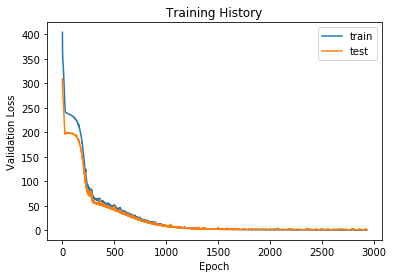

In [5]:
# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Validation Loss')
pyplot.show()

('Training Set R-Square=', 0.9949287381599607)


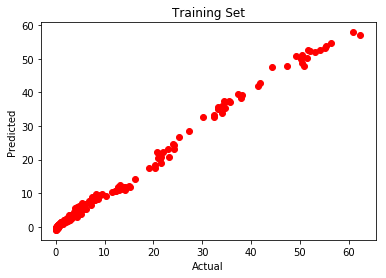

In [6]:
# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

('Validation Set R-Square=', 0.9916464732839869)


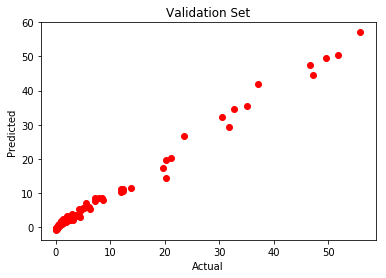

In [7]:
# Plot actual vs prediction for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)